## Problema 5 - Diagnóstico por la escritura

#### Marc Nebot Moyano

#### Librerías necesarias

In [ ]:
from apafib import load_darwin
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
show_html = lambda html: display(HTML(html))

#### Apartado a)

##### Carga de datos

Cargaremos los datos a continuación

In [ ]:
darwin_data = load_darwin()
darwin_data

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


Eliminamos la columna ID, pues es un string que no nos aporta nada

In [ ]:
darwin_data = darwin_data.drop(['ID'], axis=1)
darwin_data

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,0.032691,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,0.032059,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,0.022705,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,0.090686,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [ ]:
darwin_data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


Podemos ver que tenemos una muestra balanceada

<AxesSubplot: xlabel='class', ylabel='Count'>

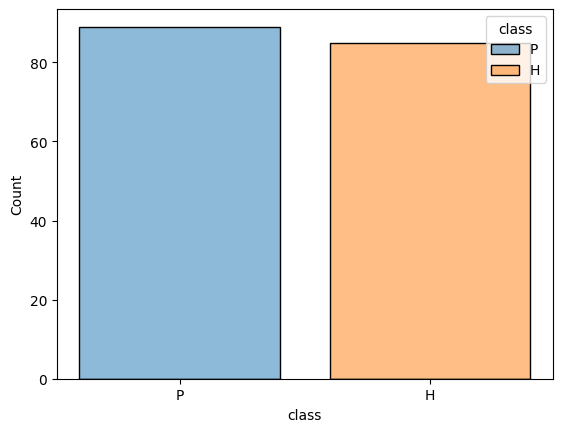

In [ ]:
sns.histplot(darwin_data, x='class', hue='class', shrink = 0.8)

In [ ]:
X = darwin_data.loc[:,darwin_data.columns != "class"]
y = darwin_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45,stratify=y)

##### Preproceso

Examinamos si hay valores perdidos

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

air_time1           0
num_of_pendown19    0
disp_index18        0
air_time18          0
total_time17        0
                   ..
gmrt_in_air9        0
disp_index9         0
air_time9           0
total_time8         0
total_time25        0
Length: 450, dtype: int64

In [ ]:
X_train.shape

(121, 450)

In [ ]:
X_test.shape

(53, 450)

Vamos a realizar un pequeño análisis antes de proceder a ejecutar el modelo

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA().fit(X_train);

Podemos observar que la variancia explicada llega al 80% a partir de bastantes componentes

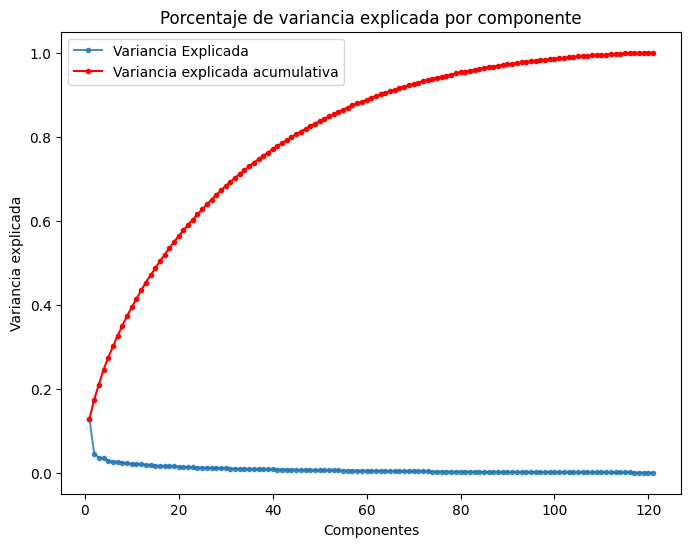

In [ ]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

##### Ejecución del modelo

In [ ]:
def save_results(clf, xt, yt, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(yt, clf.predict(xt))
    df.loc[nclf,'precision score (W)'] = precision_score(yt, clf.predict(xt), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(yt, clf.predict(xt), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(yt, clf.predict(xt), average='weighted')
    return df

results_df = pd.DataFrame()
results_df_log = pd.DataFrame()

A priori con la realización de validación cruzada nos da buenos resultados, procederemos a analizar los resultados del modelo una vez encontrado el mejor estimador

In [ ]:
gnb = GaussianNB()

In [ ]:
param = {'var_smoothing':10**np.linspace(-3,3,100, endpoint=True)}
gnb_gs =  GridSearchCV(gnb,param,cv=10, n_jobs=-1, refit=True)
gnb_gs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(gnb_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
39,{'var_smoothing': 0.23101297000831605},0.884615,1
37,{'var_smoothing': 0.1747528400007685},0.884615,1
38,{'var_smoothing': 0.2009233002565048},0.876282,3
36,{'var_smoothing': 0.1519911082952933},0.876282,3
27,{'var_smoothing': 0.04328761281083059},0.876282,5


In [ ]:
print(np.mean(cross_val_score(gnb_gs.best_estimator_,X_train,y_train,cv=10)))

0.8846153846153847


In [ ]:
print(classification_report(gnb_gs.best_estimator_.predict(X_test), y_test,target_names=['H', 'P']))
results_df = save_results(gnb_gs.best_estimator_, X_test, y_test, 'GNB', results_df)

              precision    recall  f1-score   support

           H       0.77      0.80      0.78        25
           P       0.81      0.79      0.80        28

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0.79        53



Podemos ver buenos resultados puesto que la tasa de acierto es bastante alta

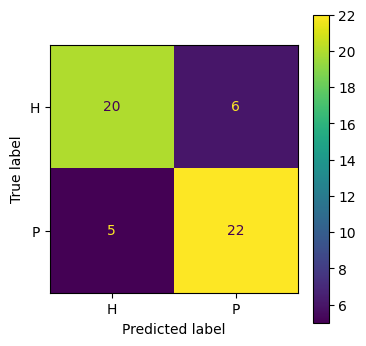

In [ ]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(gnb_gs.best_estimator_, X_test,y_test, display_labels=['H', 'P'], ax=plt.subplot());

#### Apartado b)

##### SVC

Vamos a buscar los hiperparámetros del modelo para saber cuál es el mejor kernel con sus respectivos grados y gammas, obviamente un modelo lineal no nos aportará mejores resultados en este problema

In [ ]:
Cs = np.logspace(-2, 1, 100)
gammas = np.logspace(-9, 5, 100)

parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas,}, {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(2, 4)}]

gs_svc = GridSearchCV(SVC(), 
                    param_grid = parametres, 
                    cv = 10, 
                    scoring = 'accuracy', 
                    n_jobs=-1)
grid_search = gs_svc.fit(X_train, y_train)
grid_search.cv_results_

print("Hyperparameters: %s Average accuracy: %0.2f"
      % (gs_svc.best_params_, gs_svc.best_score_))

Hyperparameters: {'C': 8.111308307896872, 'gamma': 0.0001232846739442066, 'kernel': 'rbf'} Average accuracy: 0.89


Hemos podido observar que el mejor kernel para este problema es RBF

In [ ]:
print(np.mean(cross_val_score(gs_svc.best_estimator_,X_train,y_train,cv=10)))

0.8923076923076921


In [ ]:
print(classification_report(gs_svc.best_estimator_.predict(X_test), y_test,target_names=['H', 'P']))
results_df = save_results(gs_svc.best_estimator_, X_test, y_test, 'GNB', results_df)

              precision    recall  f1-score   support

           H       0.77      0.83      0.80        24
           P       0.85      0.79      0.82        29

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



Podemos observar una mejoría de la situación pero tampoco demasiada pues solo tenemos un acierto más lo que sube la accuracy un 0.02

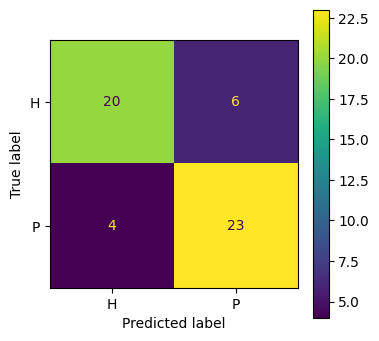

In [ ]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(gs_svc.best_estimator_, X_test,y_test, display_labels=['H', 'P'], ax=plt.subplot());

#### Apartado c)

##### Random forests

Seguidamente vamos a entrenar random forests para ver qué resultados nos dan y compararlos con los anteriores modelos

In [ ]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['gini', 'entropy'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestClassifier(random_state=0)
rf_bs =  BayesSearchCV(rf,param,n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_train, y_train);

d:\Programas\Python3.10.7\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [ ]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
39,"{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 50}",0.900000,1
22,"{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 50}",0.900000,1
23,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 50}",0.900000,1
29,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}",0.900000,1
16,"{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 40}",0.884615,5


In [ ]:
print(classification_report(rf_bs.predict(X_test), y_test,target_names=['H', 'P']))
results_df = save_results(rf_bs, X_test, y_test, 'Random Forest', results_df)

              precision    recall  f1-score   support

           H       0.85      0.88      0.86        25
           P       0.89      0.86      0.87        28

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



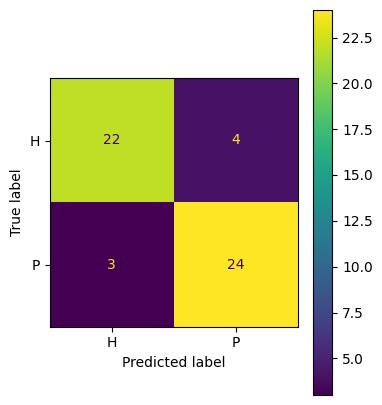

In [ ]:
plt.figure(figsize=(4,5));
ConfusionMatrixDisplay.from_estimator(rf_bs, X_test,y_test, ax=plt.subplot())

##### Gradient boosting

Seguidamente entrenaremos con gradient boosting

In [ ]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'loss':['log_loss', 'exponential'], 
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10], 
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gb =  GradientBoostingClassifier(random_state=0,n_iter_no_change=5)
gb_bs =  BayesSearchCV(gb,param,n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(gb_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
19,"{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 40}",0.876923,1
32,"{'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 40}",0.876923,1
17,"{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 25}",0.876923,1
2,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.867308,4
34,"{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 75}",0.867308,4


In [ ]:
print(classification_report(gb_bs.predict(X_test), y_test,target_names=['H', 'P']))
results_df = save_results(gb_bs, X_test, y_test, 'Gradient Boosting', results_df)

              precision    recall  f1-score   support

           H       0.77      0.83      0.80        24
           P       0.85      0.79      0.82        29

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



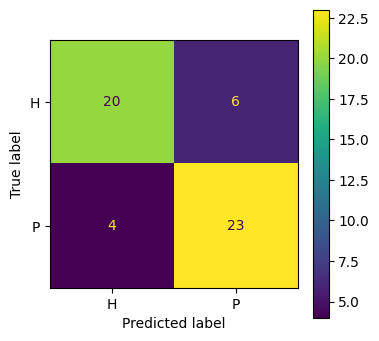

In [ ]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(gb_bs, X_test,y_test, ax=plt.subplot())

Hemos podido observar que el modelo de naive bayes es el que nos da peores resultados, pues este es uno de los modelos más sencillos que hemos utilizado, por otro lado, el modelo que nos da mejores resultados es random forests y gradient boosting es muy similar a svc en este caso.

#### Apartado d)

##### Voting classifier

Probaremos con un voting classifier juntando naive bayes gradient boosting y random forest

In [ ]:
vs = VotingClassifier([('gb', gb_bs.best_estimator_),
                        ('gnb', gnb_gs.best_estimator_),
                        ('rf', rf_bs.best_estimator_)],voting='soft', n_jobs=1)
print(np.mean(cross_val_score(vs,X_train,y_train,cv=10)))                             
vs.fit(X_train, y_train);

0.9179487179487179


Podemos ver buenos resultados y una cierta mejoría

In [ ]:
print(classification_report(vs.predict(X_test), y_test,target_names=['H', 'P']))
results_df = save_results(vs, X_test, y_test, 'Voting GB+GNB+RF', results_df)

              precision    recall  f1-score   support

           H       0.88      0.88      0.88        26
           P       0.89      0.89      0.89        27

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



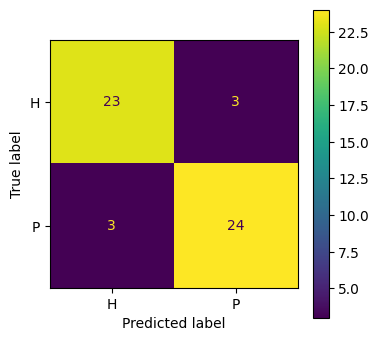

In [ ]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(vs, X_test,y_test, display_labels=['H', 'P'], ax=plt.subplot());

##### Conclusión principal

Hemos podido observar que con un voting classifier mejoramos un poco los resultados de nuestro modelo, siendo esto producente y podemos observar que la unión de tres modelos nos ayuda a desempatar en caso de empate